<a href="https://colab.research.google.com/github/jangbigom91/Bigdata/blob/master/tf07_cifar10_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 2020/08/19
이름 : 최정한
내용 : 딥러닝 cifar10 이미지 분류 실습하기
"""

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from PIL import Image #파이썬 이미지 처리 라이브러리

In [ ]:
#학습데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

#데이터 형태 확인
print(cifar_train_data.shape, cifar_train_label.shape)
print(cifar_test_data.shape, cifar_test_label.shape)
print(cifar_train_label)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


[12603 46095  1066 44553 48884 34575 27048 17432 48124]


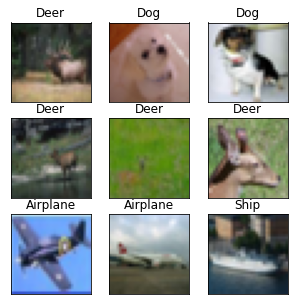

In [ ]:
#데이터 샘플 이미지 출력
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title('%s' % class_names[label])

In [ ]:
#데이터셋 분할하기
train_data, test_data, train_label, test_label = train_test_split(cifar_train_data, cifar_train_label)
print('훈련 데이터 : ', train_data.shape)
print('검증 데이터 : ', test_data.shape)

훈련 데이터 :  (37500, 32, 32, 3)
검증 데이터 :  (12500, 32, 32, 3)


In [ ]:
#모델학습을 위한 데이터 전처리(정규화)

#방법1 : 픽셀데이터를 0 ~ 1 사이로 초기화 -> 정확도 낮음
#train_data = train_data / 255
#test_data = test_data / 255
#mnist_test_data = mnist_test_data / 255

#방법2 : 픽셀데이터를 평균과 표준편차를 이용한 정규화 -> 정확도 높음
mean = np.mean(train_data, axis=(0, 1, 2))
std = np.std(train_data, axis=(0, 1, 2))

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std
cifar_test_data = (cifar_test_data - mean) / std


#각 데이터의 레이블을 범주형(One-hot encoding) 형태로 변환
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
cifar_test_label = to_categorical(cifar_test_label)

In [ ]:
#학습 모델 구성하기
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) #입력층
model.add(Dense(64, activation='relu'))  #은닉층
model.add(Dense(32, activation='relu'))  #은닉층
model.add(Dense(10, activation='softmax')) #출력층

In [ ]:
#학습모델 선정하기
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#학습하기
model.fit(train_data,
          train_label,
          epochs=30,
          batch_size=128,
          validation_data=(test_data, test_label))

Epoch 1/30
293/293 [==============================] - 2s 6ms/step - loss: 1.8391 - acc: 0.3620 - val_loss: 1.6863 - val_acc: 0.4198
Epoch 2/30
293/293 [==============================] - 2s 6ms/step - loss: 1.6127 - acc: 0.4370 - val_loss: 1.6234 - val_acc: 0.4425
Epoch 3/30
293/293 [==============================] - 2s 6ms/step - loss: 1.5051 - acc: 0.4693 - val_loss: 1.5714 - val_acc: 0.4569
Epoch 4/30
293/293 [==============================] - 2s 6ms/step - loss: 1.4368 - acc: 0.4990 - val_loss: 1.5473 - val_acc: 0.4662
Epoch 5/30
293/293 [==============================] - 2s 6ms/step - loss: 1.3851 - acc: 0.5136 - val_loss: 1.5171 - val_acc: 0.4768
Epoch 6/30
293/293 [==============================] - 2s 6ms/step - loss: 1.3403 - acc: 0.5292 - val_loss: 1.5227 - val_acc: 0.4741
Epoch 7/30
293/293 [==============================] - 2s 5ms/step - loss: 1.3010 - acc: 0.5442 - val_loss: 1.5280 - val_acc: 0.4738
Epoch 8/30
293/293 [==============================] - 2s 6ms/step - loss: 1.

In [ ]:
#평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 0s 1ms/step - loss: 1.7452 - acc: 0.4834


[1.7452187538146973, 0.48339998722076416]

In [ ]:
#테스트하기
result = model.predict(cifar_test_data)

from sklearn.metrics import accuracy_score
score = accuracy_score(result.round(), cifar_test_label)
print('점수 : ', score)

점수 :  0.393
